In [1624]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

In [1625]:
train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')

In [1626]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1627]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1628]:
#Save the training and test ID

In [1629]:
test_id=test['Id']
train_id=train['Id']

In [1630]:
#Id isn't needed for prediction, so we drop it
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

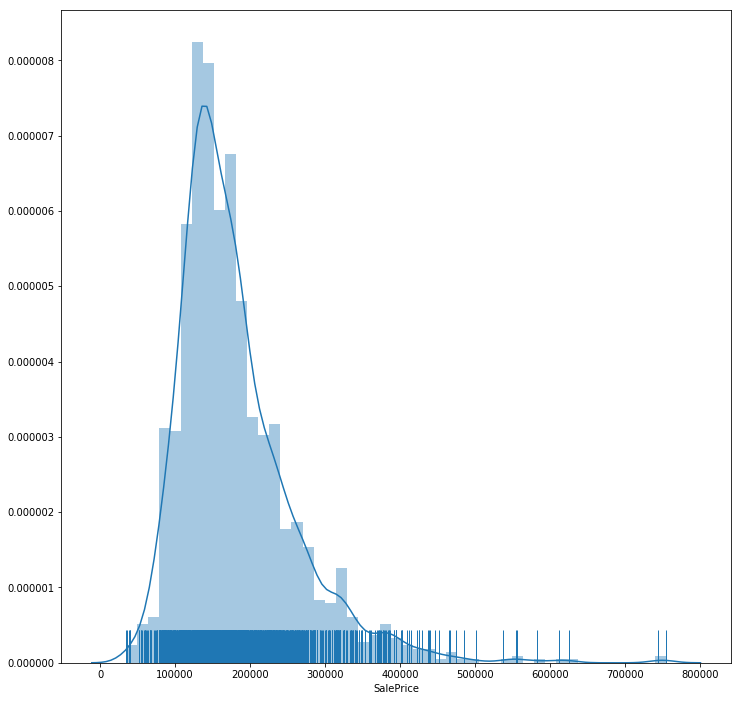

In [1631]:
#Dependent Variable Visualisations
plt.figure(figsize=(12,12))
sns.distplot(train.SalePrice,rug=True)
plt.show()

In [1632]:
#Dependent Variable needs to be transformed due to heavy left tail
train["SalePrice"] = np.log1p(train["SalePrice"])

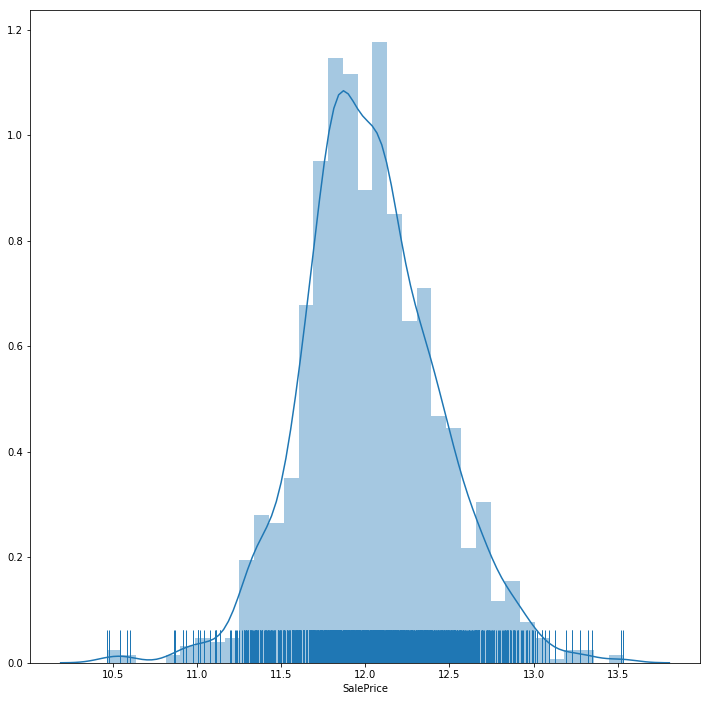

In [1633]:
plt.figure(figsize=(12,12))
sns.distplot(train.SalePrice,rug=True)
plt.show()

In [1634]:
#DATA PROCESSING AND ENGINEERING

In [1635]:
strain = train.shape[0]
stest = test.shape[0]
y_train = train.SalePrice.values
df_all = pd.concat((train, test)).reset_index(drop=True)
df_all.drop(['SalePrice'], axis=1, inplace=True)

In [1636]:
#Check to see number of null in the data set

In [1637]:
df_all.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2721
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
                 ... 
LotFrontage       486
LotShape            0
LowQualFinSF        0
MSSubClass          0
MSZoning            4
MasVnrArea         23
MasVnrType         24
MiscFeature      2814
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PavedDrive

In [1638]:
#Removing Columns which have over 50% NAN VALUES

In [1639]:
df_all.drop(['MiscFeature','PoolQC'],axis=1,inplace=True)

In [1640]:
#seperate catgeorical features and non cateogrial features

In [1641]:
cat=df_all.select_dtypes(include=['object'])

In [1642]:
non_cat=df_all.select_dtypes(include=['float64','int64'])

In [1643]:
#clean non cat features

In [1644]:
non_cat.isnull().sum()

1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
BedroomAbvGr       0
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFullBath       2
BsmtHalfBath       2
BsmtUnfSF          1
EnclosedPorch      0
Fireplaces         0
FullBath           0
GarageArea         1
GarageCars         1
GarageYrBlt      159
GrLivArea          0
HalfBath           0
KitchenAbvGr       0
LotArea            0
LotFrontage      486
LowQualFinSF       0
MSSubClass         0
MasVnrArea        23
MiscVal            0
MoSold             0
OpenPorchSF        0
OverallCond        0
OverallQual        0
PoolArea           0
ScreenPorch        0
TotRmsAbvGrd       0
TotalBsmtSF        1
WoodDeckSF         0
YearBuilt          0
YearRemodAdd       0
YrSold             0
dtype: int64

In [1645]:
non_cat.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

In [1646]:
# Fill non cat features using median

In [1647]:
df_non_cat=['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold']

In [1648]:
df_all[df_non_cat]=df_all[df_non_cat].fillna(df_all[df_non_cat].median())

In [1649]:
#check to see no null values present
df_all[df_non_cat].isnull().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BedroomAbvGr     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFullBath     0
BsmtHalfBath     0
BsmtUnfSF        0
EnclosedPorch    0
Fireplaces       0
FullBath         0
GarageArea       0
GarageCars       0
GarageYrBlt      0
GrLivArea        0
HalfBath         0
KitchenAbvGr     0
LotArea          0
LotFrontage      0
LowQualFinSF     0
MSSubClass       0
MasVnrArea       0
MiscVal          0
MoSold           0
OpenPorchSF      0
OverallCond      0
OverallQual      0
PoolArea         0
ScreenPorch      0
TotRmsAbvGrd     0
TotalBsmtSF      0
WoodDeckSF       0
YearBuilt        0
YearRemodAdd     0
YrSold           0
dtype: int64

In [1650]:
#Categrorical Feature Engineering

In [1651]:
df_cat_features=['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'Neighborhood', 'PavedDrive',
       'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street',
       'Utilities']

In [1652]:
df_all[df_cat_features].isnull().sum()

Alley            2721
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
BsmtQual           81
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu      1420
Foundation          0
Functional          2
GarageCond        159
GarageFinish      159
GarageQual        159
GarageType        157
Heating             0
HeatingQC           0
HouseStyle          0
KitchenQual         1
LandContour         0
LandSlope           0
LotConfig           0
LotShape            0
MSZoning            4
MasVnrType         24
Neighborhood        0
PavedDrive          0
RoofMatl            0
RoofStyle           0
SaleCondition       0
SaleType            1
Street              0
Utilities           2
dtype: int64

In [1653]:
#drop variables with many missing values
df_all.drop(['Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [1654]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_all[col] = df_all[col].fillna('None')

In [1655]:
for col in ('GarageCond', 'GarageFinish', 'GarageQual', 'GarageType'):
    df_all[col] = df_all[col].fillna('TA')

In [1656]:
for col in ( 'Electrical','Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual','MSZoning', 'MasVnrType','SaleType', 'Utilities'):
    df_all[col]=df_all[col].fillna(method='ffill')

In [1657]:
df_cat_new_feats=[ 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
        'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'Neighborhood', 'PavedDrive',
       'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street',
       'Utilities']

In [1658]:
#check to see non null values
df_all[df_cat_new_feats].isnull().sum()

BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
BsmtQual         0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Foundation       0
Functional       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
Heating          0
HeatingQC        0
HouseStyle       0
KitchenQual      0
LandContour      0
LandSlope        0
LotConfig        0
LotShape         0
MSZoning         0
MasVnrType       0
Neighborhood     0
PavedDrive       0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SaleType         0
Street           0
Utilities        0
dtype: int64

In [1659]:
#Label Encode and One hot encode features

In [1660]:
label_encoder=LabelEncoder()

In [1661]:
encoded=df_all[df_cat_new_feats].apply(label_encoder.fit_transform)

In [1662]:
df_all=df_all[df_non_cat].join(encoded)

In [1663]:
df_all.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
BedroomAbvGr       int64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtUnfSF        float64
EnclosedPorch      int64
Fireplaces         int64
FullBath           int64
GarageArea       float64
GarageCars       float64
GarageYrBlt      float64
GrLivArea          int64
HalfBath           int64
KitchenAbvGr       int64
LotArea            int64
LotFrontage      float64
LowQualFinSF       int64
MSSubClass         int64
MasVnrArea       float64
MiscVal            int64
MoSold             int64
OpenPorchSF        int64
OverallCond        int64
OverallQual        int64
PoolArea           int64
ScreenPorch        int64
                  ...   
Condition2         int64
Electrical         int64
ExterCond          int64
ExterQual          int64
Exterior1st        int64
Exterior2nd        int64
Foundation         int64
Functional         int64
GarageCond         int64


In [1664]:
ohe_features = df_cat_new_feats
for f in ohe_features:
    df_all_dummy = pd.get_dummies(df_all[f], prefix=f)
    df_all = df_all.drop([f], axis=1)
    df_all = pd.concat((df_all, df_all_dummy), axis=1)

In [1665]:
#create a training and testing data set

In [1666]:
train=df_all[:strain]

In [1667]:
train.shape

(1460, 277)

In [1668]:
test= df_all[strain:]

In [1669]:
test.shape

(1459, 277)

In [1670]:
#Model Selection and Prediction

In [1671]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [1672]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [1673]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [1674]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1231 (0.0114)



In [1675]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [1676]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.0798764011064


In [1677]:
#submission

In [1678]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = xgb_pred
sub.to_csv('./submission_engineer.csv',index=False)